# CNNs with Keras
Import various modules that we need for this notebook.

In [2]:
%pylab inline

import copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils
from keras.regularizers import l2
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

Using Theano backend.
/Users/taylor/anaconda3/lib/python3.5/site-packages/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


Populating the interactive namespace from numpy and matplotlib


Load the MNIST dataset, flatten the images, convert the class labels, and scale the data.

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32') / 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### I. Basic CNN Example 
Build and compile a basic model.

In [3]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape = (1, 28, 28)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
          
rms = RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=rms)

Fit the model over 10 epochs. The predictiveness is impressive for such a small model!

In [4]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10,
          verbose=1, show_accuracy=True, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 77s - loss: 0.2385 - acc: 0.9296 - val_loss: 0.0934 - val_acc: 0.9735
Epoch 2/10
54000/54000 [==============================] - 78s - loss: 0.1009 - acc: 0.9699 - val_loss: 0.0653 - val_acc: 0.9833
Epoch 3/10
54000/54000 [==============================] - 73s - loss: 0.0793 - acc: 0.9763 - val_loss: 0.0648 - val_acc: 0.9818
Epoch 4/10
54000/54000 [==============================] - 73s - loss: 0.0696 - acc: 0.9790 - val_loss: 0.0589 - val_acc: 0.9842
Epoch 5/10
54000/54000 [==============================] - 81s - loss: 0.0643 - acc: 0.9803 - val_loss: 0.0529 - val_acc: 0.9853
Epoch 6/10
54000/54000 [==============================] - 82s - loss: 0.0595 - acc: 0.9823 - val_loss: 0.0511 - val_acc: 0.9852
Epoch 7/10
54000/54000 [==============================] - 81s - loss: 0.0541 - acc: 0.9837 - val_loss: 0.0518 - val_acc: 0.9855
Epoch 8/10
54000/54000 [==============================]

For reference, here are the dimensions of the weights in each layer:

In [5]:
print(model.layers[0].get_weights()[0].shape) # Convolution2D
print(model.layers[5].get_weights()[0].shape) # Dense

(32, 1, 3, 3)
(6272, 10)


Evaluate model on the test set

In [6]:
print("Test classification rate %0.05f" % model.evaluate(X_test, Y_test, show_accuracy=True)[1])

10000/10000 [==============================] - 4s     
Test classification rate 0.98500


Predict classes on the test set.

In [7]:
y_hat = model.predict_classes(X_test)
pd.crosstab(y_hat, y_test)

10000/10000 [==============================] - 4s     


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,976,0,3,0,2,2,9,0,5,4
1,0,1130,5,0,1,0,3,4,1,1
2,1,1,1014,0,1,0,1,12,3,0
3,0,4,0,1006,0,5,1,2,1,2
4,0,0,2,0,966,0,2,1,3,4
5,1,0,0,1,0,882,4,0,3,3
6,1,0,0,0,0,2,934,0,0,0
7,1,0,6,0,0,0,0,1003,4,6
8,0,0,1,3,1,1,4,3,950,0


150


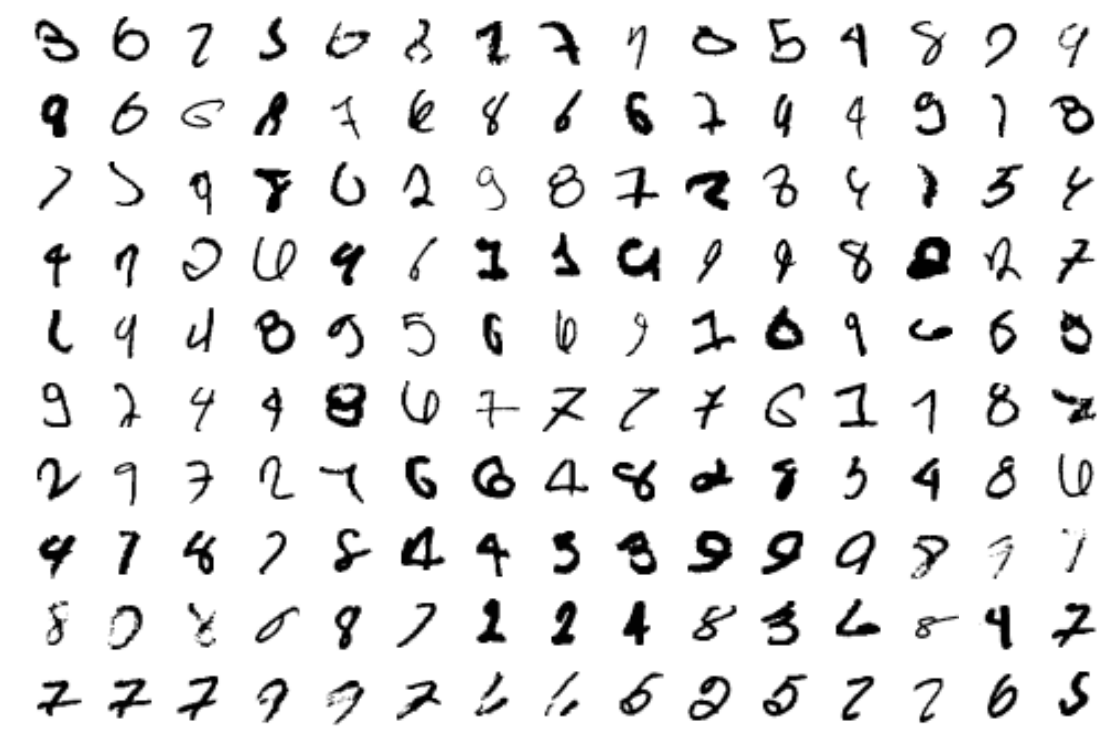

In [8]:
test_wrong = [im for im in zip(X_test,y_hat,y_test) if im[1] != im[2]]
print(len(test_wrong))

plt.figure(figsize=(15, 15))
for ind, val in enumerate(test_wrong):
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.subplot(15, 15, ind + 1)
    im = 1 - val[0].reshape((28,28))
    axis("off")
    plt.imshow(im, cmap='gray')

### II. Double convolution

Putting two layers of convolution immediately after one another tends to produce very predictive models. Here, we also follow the convolution layers by a dense hidden layer. Note that training this model takes **significantly** longer than the dense models to run. As such, I ran only the first 1000 samples. Using all of them should yield a classification rate near 99.5% on the entire test set.

In [26]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape = (1, 28, 28)))
model.add(Activation("relu"))
model.add(Convolution2D(32, 3, 3, border_mode='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
          
rms = RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=rms)

In [28]:
model.fit(X_train[:1000], Y_train[:1000], batch_size=32, nb_epoch=10,
          verbose=1, show_accuracy=True, validation_split=0.1)

Train on 900 samples, validate on 100 samples
Epoch 1/10
900/900 [==============================] - 19s - loss: 0.4450 - acc: 0.8778 - val_loss: 0.4454 - val_acc: 0.8900
Epoch 2/10
900/900 [==============================] - 18s - loss: 0.3611 - acc: 0.8856 - val_loss: 0.3440 - val_acc: 0.9300
Epoch 3/10
900/900 [==============================] - 18s - loss: 0.2709 - acc: 0.9144 - val_loss: 0.3264 - val_acc: 0.9300
Epoch 4/10
900/900 [==============================] - 18s - loss: 0.1793 - acc: 0.9500 - val_loss: 0.3054 - val_acc: 0.9300
Epoch 5/10
900/900 [==============================] - 18s - loss: 0.1511 - acc: 0.9567 - val_loss: 0.3735 - val_acc: 0.9300
Epoch 6/10
900/900 [==============================] - 18s - loss: 0.1427 - acc: 0.9544 - val_loss: 0.3541 - val_acc: 0.9400
Epoch 7/10
900/900 [==============================] - 18s - loss: 0.1455 - acc: 0.9578 - val_loss: 0.3604 - val_acc: 0.9400
Epoch 8/10
900/900 [==============================] - 18s - loss: 0.1031 - acc: 0.9689

In [29]:
print("Test classification rate %0.05f" % model.evaluate(X_test, Y_test, show_accuracy=True)[1])
y_hat = model.predict_classes(X_test)
pd.crosstab(y_hat, y_test)

10000/10000 [==============================] - 95s    
Test classification rate 0.93680
10000/10000 [==============================] - 98s    


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,968,0,7,2,0,7,20,2,28,13
1,0,1125,12,1,0,4,4,3,12,3
2,1,1,968,5,4,1,3,27,6,3
3,0,1,11,962,0,44,0,14,23,13
4,1,0,3,1,936,6,2,7,14,18
5,0,0,0,9,0,779,12,2,4,1
6,6,1,5,4,9,17,916,0,17,0
7,1,0,9,11,0,4,0,938,8,6
8,3,6,15,8,3,17,1,2,825,1


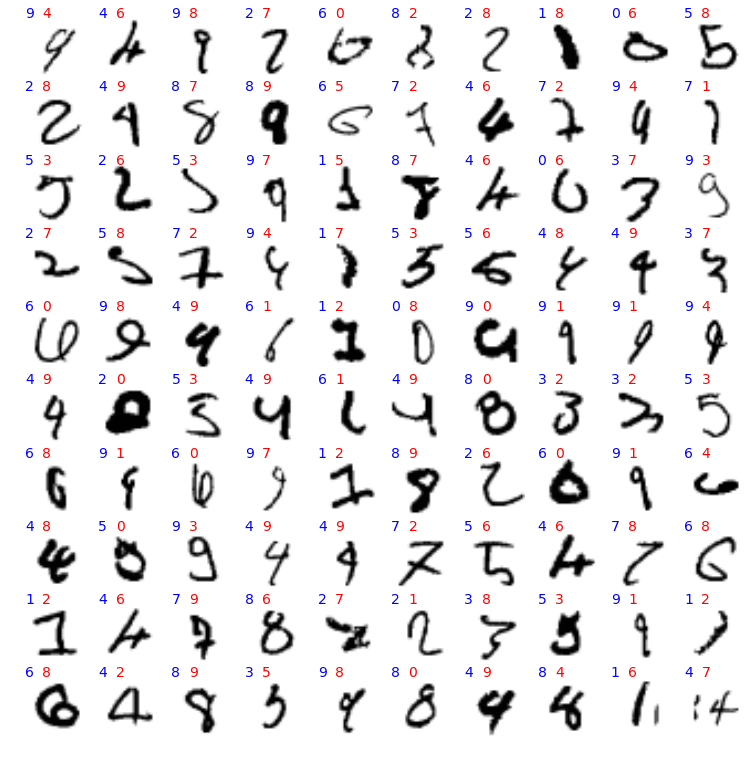

In [10]:
test_wrong = [im for im in zip(X_test,y_hat,y_test) if im[1] != im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

### III. Visualizing convolution weights
Now, we want to visualize the convolution layers here.

In [30]:
print(model.layers) # list of the layers
print(model.layers[0].get_weights()[0].shape) # the weights

[<keras.layers.convolutional.Convolution2D object at 0x12a98f2e8>, <keras.layers.core.Activation object at 0x12a98f358>, <keras.layers.convolutional.Convolution2D object at 0x12a98f748>, <keras.layers.core.Activation object at 0x12a98f780>, <keras.layers.convolutional.MaxPooling2D object at 0x12a98fac8>, <keras.layers.core.Dropout object at 0x12a98fb00>, <keras.layers.core.Flatten object at 0x12a98fbe0>, <keras.layers.core.Dense object at 0x12a98fc88>, <keras.layers.core.Activation object at 0x12a98fcf8>, <keras.layers.core.Dropout object at 0x12a98f3c8>, <keras.layers.core.Dense object at 0x12a98fcc0>, <keras.layers.core.Activation object at 0x12a9931d0>]
(32, 1, 3, 3)


The first set of weights will be given as weights the same size as the input space.

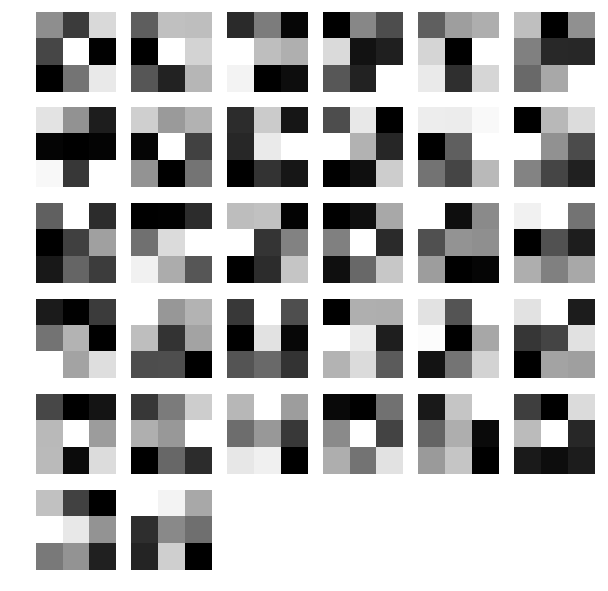

In [31]:
W1 = model.layers[0].get_weights()[0]

plt.figure(figsize=(10, 10), frameon=False)
for ind, val in enumerate(W1):
    plt.subplot(6, 6, ind + 1)
    im = val.reshape((3,3))
    plt.axis("off")
    plt.imshow(im, cmap='gray',interpolation='nearest')

The second layer of weights will be given as a set of 32 weights with dimensions of 3x3x32.

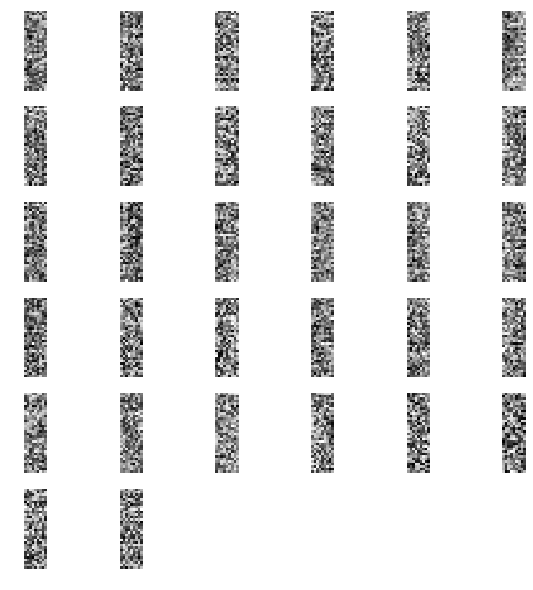

In [32]:
W2 = model.layers[2].get_weights()[0]

plt.figure(figsize=(10, 10), frameon=False)
for ind, val in enumerate(W2):
    plt.subplot(6, 6, ind + 1)
    im = val.reshape((32,9))
    plt.axis("off")
    plt.imshow(im, cmap='gray',interpolation='nearest')

### IV. Activations of the neural network

Look at activations of several examples after the first layer:

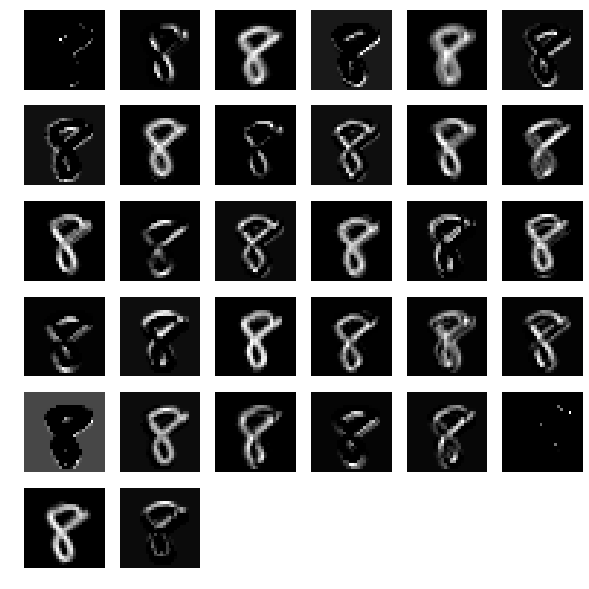

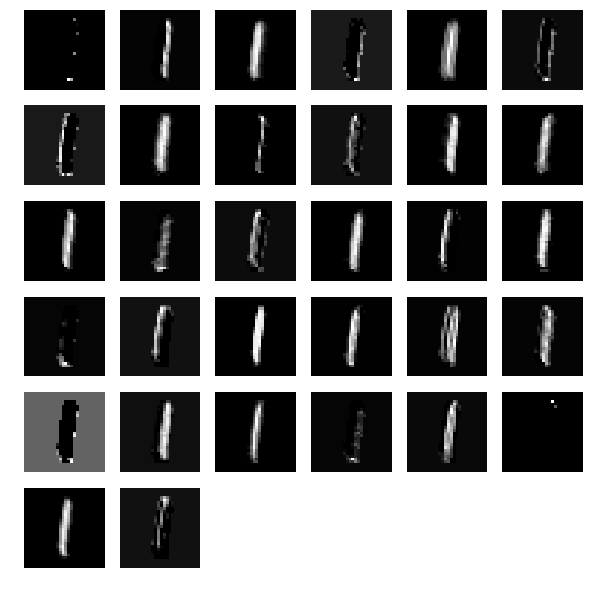

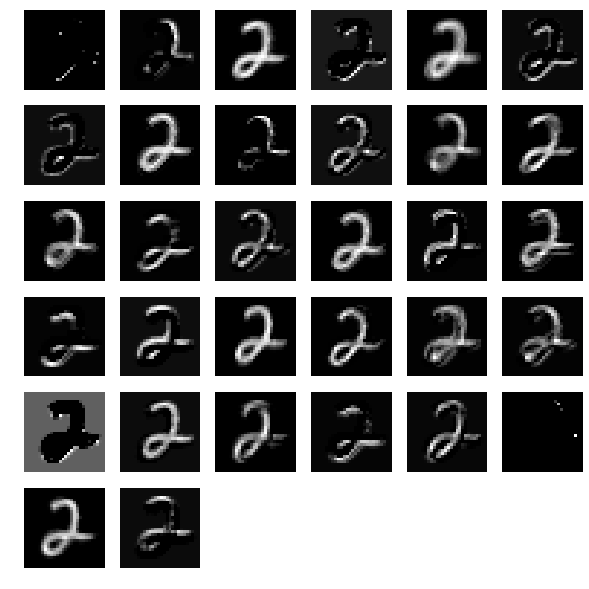

In [33]:
model2 = copy.copy(model)
model2.layers = model2.layers[:2]
model2.compile(loss='categorical_crossentropy', optimizer=rms) # don't forget this step!

these = random.choice(range(1000),3,replace=False)
x_rep = model2.predict(X_test[these])

for this_x_rep in x_rep:
    plt.figure(figsize=(10, 10), frameon=False)
    for ind, val in enumerate(this_x_rep):
        plt.subplot(6, 6, ind + 1)
        plt.axis("off")
        plt.imshow(val, cmap='gray',interpolation='nearest')

Activations after the second layer:

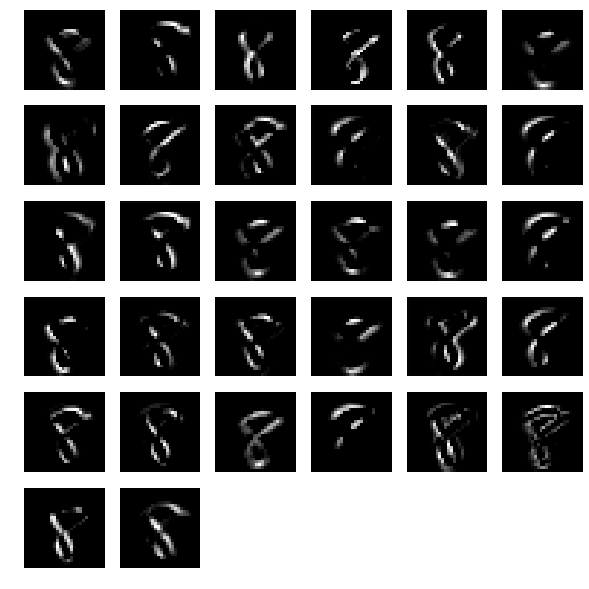

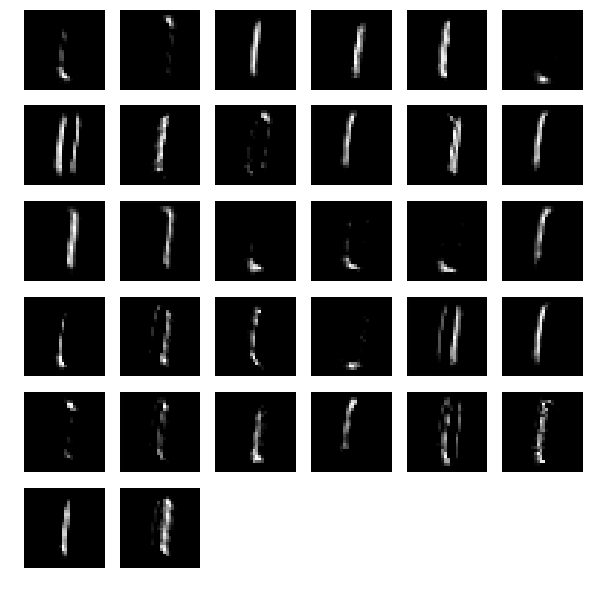

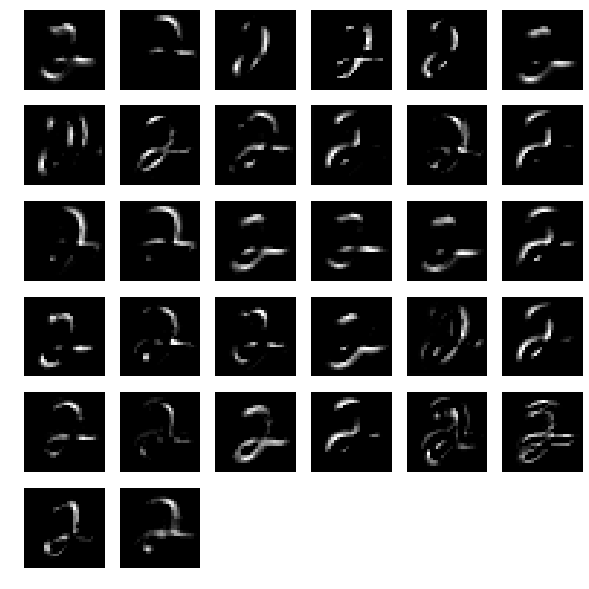

In [34]:
model2 = copy.copy(model)
model2.layers = model2.layers[:4]
model2.compile(loss='categorical_crossentropy', optimizer=rms) # don't forget this step!

x_rep = model2.predict(X_test[these])

for this_x_rep in x_rep:
    plt.figure(figsize=(10, 10), frameon=False)
    for ind, val in enumerate(this_x_rep):
        plt.subplot(6, 6, ind + 1)
        plt.axis("off")
        plt.imshow(val, cmap='gray',interpolation='nearest')

Finally, activations after max pooling:

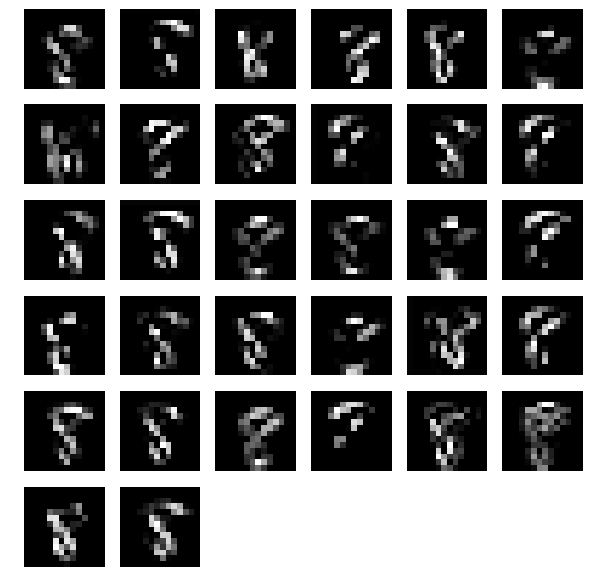

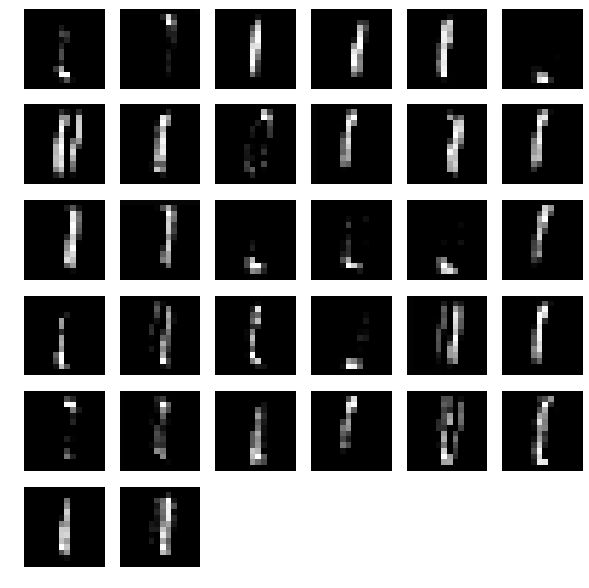

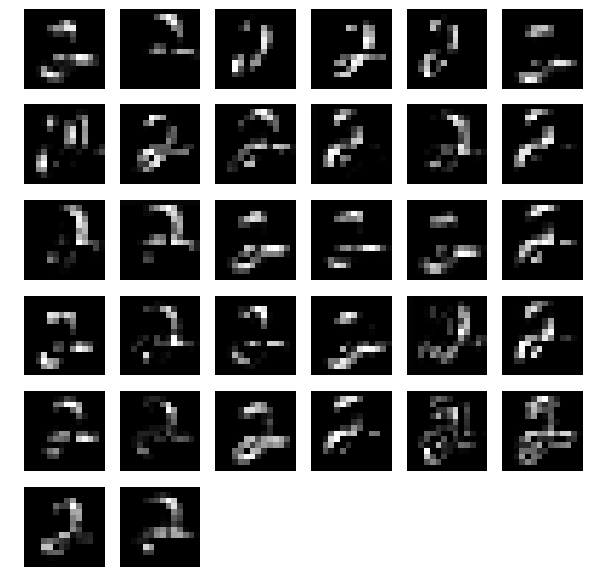

In [35]:
model2 = copy.copy(model)
model2.layers = model2.layers[:5]
model2.compile(loss='categorical_crossentropy', optimizer=rms) # don't forget this step!

x_rep = model2.predict(X_test[these])

for this_x_rep in x_rep:
    plt.figure(figsize=(10, 10), frameon=False)
    for ind, val in enumerate(this_x_rep):
        plt.subplot(6, 6, ind + 1)
        plt.axis("off")
        plt.imshow(val, cmap='gray',interpolation='nearest')

### V. Further tweaks: alternative optimizers and early stopping
Just to show off a few more tweaks, we'll run a simple MLP model. Here we use weights and an alternative to vanillia stochastic gradient descent. 

In [36]:
model = Sequential()

model.add(Flatten(input_shape = (1, 28, 28)))
model.add(Dense(128, init="glorot_normal"))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

In [65]:
rms = RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=rms)

model.fit(X_train, Y_train, batch_size=32, nb_epoch=25,
          verbose=1, show_accuracy=True, validation_split=0.1,
         callbacks=[EarlyStopping(monitor='val_loss', patience=0)])

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 5s - loss: 0.1843 - acc: 0.9496 - val_loss: 0.0973 - val_acc: 0.9753
Epoch 2/25
54000/54000 [==============================] - 6s - loss: 0.1801 - acc: 0.9519 - val_loss: 0.0935 - val_acc: 0.9760
Epoch 3/25
54000/54000 [==============================] - 6s - loss: 0.1684 - acc: 0.9541 - val_loss: 0.0944 - val_acc: 0.9760
